<a href="https://colab.research.google.com/github/Sravya-Duvvuri/Traffic/blob/main/AudioTryGFGfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
import zipfile

# Path to the zip file in Google Drive
zip_file_path = "/content/drive/My Drive/archive.zip"

# Destination directory to extract the contents
extracted_dir = "/content/traffic"

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)


In [ ]:
import os
import librosa
import numpy as np

# Set the path to the dataset folder
data_dir = "/content/traffic/sounds"

# Define a list of valid audio extensions
valid_audio_extensions = ['.wav', '.mp3', '.flac', '.ogg', '.m4a']  # Add other extensions as needed

# Load and preprocess audio data using spectrograms
labels = os.listdir(data_dir)
audio_data = []
target_labels = []

for label in labels:
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):  # Ensure it's a directory
        for audio_file in os.listdir(label_dir):
            audio_path = os.path.join(label_dir, audio_file)
            # Check if the file has a valid audio extension
            if os.path.splitext(audio_file)[1].lower() in valid_audio_extensions:
                try:
                    y, sr = librosa.load(audio_path, duration=3)  # Load audio and limit to 3 seconds
                    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
                    spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
                    # Transpose the spectrogram to have the shape (timesteps, n_mels)
                    spectrogram = spectrogram.T
                    audio_data.append(spectrogram)
                    target_labels.append(label)
                except Exception as e:
                    print(f"Error loading {audio_path}: {e}")

# Convert lists to numpy arrays
audio_data = np.array(audio_data)
target_labels = np.array(target_labels)

# Check the shapes of the data
print(f"Shape of audio_data: {audio_data.shape}")
print(f"Shape of target_labels: {target_labels.shape}")


Shape of audio_data: (600, 130, 128)
Shape of target_labels: (600,)


In [ ]:
# Encode target labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(target_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(audio_data, encoded_labels, test_size=0.2, random_state=42)

# Ensure all spectrograms have the same shape
max_length = max([spec.shape[0] for spec in audio_data])
X_train = [np.pad(spec, ((0, max_length - spec.shape[0]), (0, 0)), mode='constant') for spec in X_train]
X_test = [np.pad(spec, ((0, max_length - spec.shape[0]), (0, 0)), mode='constant') for spec in X_test]

# Convert to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)


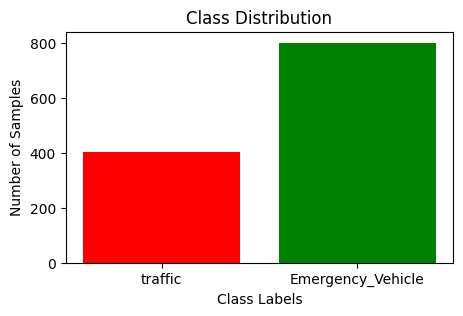

In [ ]:
import os
import matplotlib.pyplot as plt

# Set the path to the dataset folder
data_dir = "/content/traffic/sounds"

# Get the labels (subdirectories)
labels = os.listdir(data_dir)

# Count the number of samples in each class
class_counts = [len(os.listdir(os.path.join(data_dir, label))) for label in labels]

# Define colors for each class (make sure the number of colors matches the number of labels)
class_colors = ['red', 'green', 'blue']  # Adjust or extend this list if you have more than 2 classes

# Create a bar chart to visualize class distribution
plt.figure(figsize=(5, 3))
plt.bar(labels, class_counts, color=class_colors)
plt.xlabel("Class Labels")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.show()


Available classes: ['firetruck', 'ambulance', 'traffic']
Label directory: /content/traffic/sounds/ambulance
Found 200 audio files in ambulance directory.
Files: ['sound_41.wav', 'sound_122.wav', 'sound_100.wav', 'sound_172.wav', 'sound_181.wav', 'sound_82.wav', 'sound_55.wav', 'sound_130.wav', 'sound_149.wav', 'sound_95.wav', 'sound_106.wav', 'sound_27.wav', 'sound_108.wav', 'sound_159.wav', 'sound_127.wav', 'sound_189.wav', 'sound_39.wav', 'sound_192.wav', 'sound_133.wav', 'sound_47.wav', 'sound_76.wav', 'sound_129.wav', 'sound_57.wav', 'sound_117.wav', 'sound_20.wav', 'sound_54.wav', 'sound_23.wav', 'sound_99.wav', 'sound_4.wav', 'sound_52.wav', 'sound_25.wav', 'sound_90.wav', 'sound_93.wav', 'sound_190.wav', 'sound_150.wav', 'sound_49.wav', 'sound_110.wav', 'sound_97.wav', 'sound_134.wav', 'sound_183.wav', 'sound_151.wav', 'sound_87.wav', 'sound_131.wav', 'sound_165.wav', 'sound_187.wav', 'sound_98.wav', 'sound_58.wav', 'sound_188.wav', 'sound_114.wav', 'sound_3.wav', 'sound_116.wav

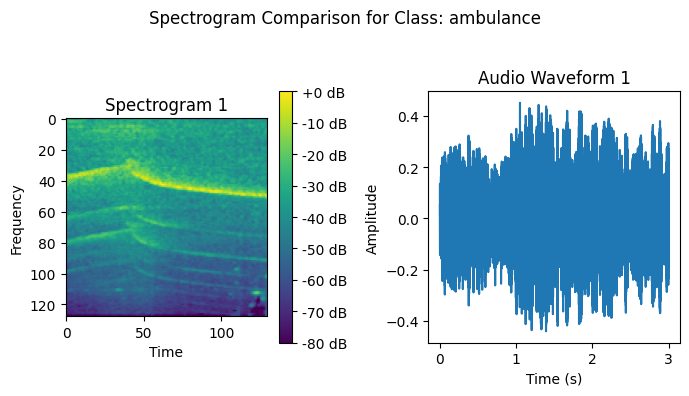

Label directory: /content/traffic/sounds/firetruck
Found 200 audio files in firetruck directory.
Files: ['sound_253.wav', 'sound_289.wav', 'sound_364.wav', 'sound_287.wav', 'sound_227.wav', 'sound_392.wav', 'sound_281.wav', 'sound_204.wav', 'sound_303.wav', 'sound_356.wav', 'sound_299.wav', 'sound_241.wav', 'sound_249.wav', 'sound_228.wav', 'sound_220.wav', 'sound_275.wav', 'sound_279.wav', 'sound_266.wav', 'sound_317.wav', 'sound_295.wav', 'sound_354.wav', 'sound_386.wav', 'sound_271.wav', 'sound_378.wav', 'sound_277.wav', 'sound_261.wav', 'sound_244.wav', 'sound_352.wav', 'sound_328.wav', 'sound_346.wav', 'sound_314.wav', 'sound_292.wav', 'sound_323.wav', 'sound_236.wav', 'sound_201.wav', 'sound_243.wav', 'sound_218.wav', 'sound_251.wav', 'sound_373.wav', 'sound_272.wav', 'sound_259.wav', 'sound_230.wav', 'sound_250.wav', 'sound_254.wav', 'sound_255.wav', 'sound_388.wav', 'sound_318.wav', 'sound_252.wav', 'sound_205.wav', 'sound_265.wav', 'sound_202.wav', 'sound_296.wav', 'sound_293.

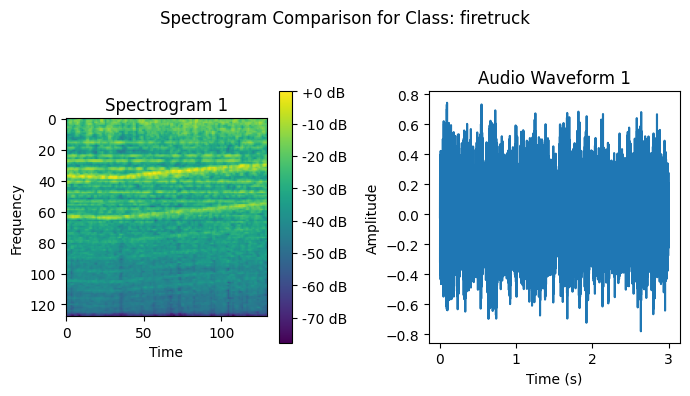

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Set the path to the dataset folder
data_dir = "/content/traffic/sounds"

# List the available classes (subdirectories) in the dataset folder
labels = os.listdir(data_dir)
print("Available classes:", labels)

# Define a function to plot spectrograms for a class
def plot_spectrograms(label, num_samples=3):
    label_dir = os.path.join(data_dir, label)

    # Debugging: Print the label directory
    print(f"Label directory: {label_dir}")

    if not os.path.exists(label_dir):
        print(f"Directory '{label_dir}' does not exist.")
        return

    plt.figure(figsize=(7, 4))
    plt.suptitle(f"Spectrogram Comparison for Class: {label}")

    # Filter out non-audio files
    audio_files = [f for f in os.listdir(label_dir) if any(f.endswith(ext) for ext in ['.wav', '.mp3', '.flac', '.ogg', '.m4a'])]

    print(f"Found {len(audio_files)} audio files in {label} directory.")
    print("Files:", audio_files)

    for i, audio_file in enumerate(audio_files[:num_samples]):
        audio_path = os.path.join(label_dir, audio_file)
        try:
            y, sr = librosa.load(audio_path, duration=3)
            spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
            spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

            plt.subplot(num_samples, 2, i * 2 + 1)
            plt.title(f"Spectrogram {i + 1}")
            plt.imshow(spectrogram, cmap="viridis")
            plt.colorbar(format="%+2.0f dB")
            plt.xlabel("Time")
            plt.ylabel("Frequency")

            plt.subplot(num_samples, 2, i * 2 + 2)
            plt.title(f"Audio Waveform {i + 1}")
            plt.plot(np.linspace(0, len(y) / sr, len(y)), y)
            plt.xlabel("Time (s)")
            plt.ylabel("Amplitude")

        except Exception as e:
            print(f"Error loading {audio_path}: {e}")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Update these class names with the actual class names from your dataset
plot_spectrograms("ambulance", num_samples=1)
plot_spectrograms("firetruck", num_samples=1)

In [ ]:
# Assuming X_train and y_train are already defined and preprocessed
# Flatten X_train into X_train_flat
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Create Gradient Boosting classifier
model = GradientBoostingClassifier(random_state=42)

# Train the model
model.fit(X_train_flat, y_train)

# Make predictions on test data and evaluate
# Assuming X_test and y_test are defined similarly
X_test_flat = X_test.reshape(X_test.shape[0], -1)
y_pred = model.predict(X_test_flat)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.4f}".format(accuracy))
print("F1 score: {:.4f}".format(f1))


Accuracy: 0.9417
F1 score: 0.9195


Available classes: ['firetruck', 'ambulance', 'traffic']
Processing class: firetruck
Label directory: /content/traffic/sounds/firetruck
Found 200 audio files in firetruck directory.
Files: ['sound_253.wav', 'sound_289.wav', 'sound_364.wav', 'sound_287.wav', 'sound_227.wav', 'sound_392.wav', 'sound_281.wav', 'sound_204.wav', 'sound_303.wav', 'sound_356.wav', 'sound_299.wav', 'sound_241.wav', 'sound_249.wav', 'sound_228.wav', 'sound_220.wav', 'sound_275.wav', 'sound_279.wav', 'sound_266.wav', 'sound_317.wav', 'sound_295.wav', 'sound_354.wav', 'sound_386.wav', 'sound_271.wav', 'sound_378.wav', 'sound_277.wav', 'sound_261.wav', 'sound_244.wav', 'sound_352.wav', 'sound_328.wav', 'sound_346.wav', 'sound_314.wav', 'sound_292.wav', 'sound_323.wav', 'sound_236.wav', 'sound_201.wav', 'sound_243.wav', 'sound_218.wav', 'sound_251.wav', 'sound_373.wav', 'sound_272.wav', 'sound_259.wav', 'sound_230.wav', 'sound_250.wav', 'sound_254.wav', 'sound_255.wav', 'sound_388.wav', 'sound_318.wav', 'sound_252.

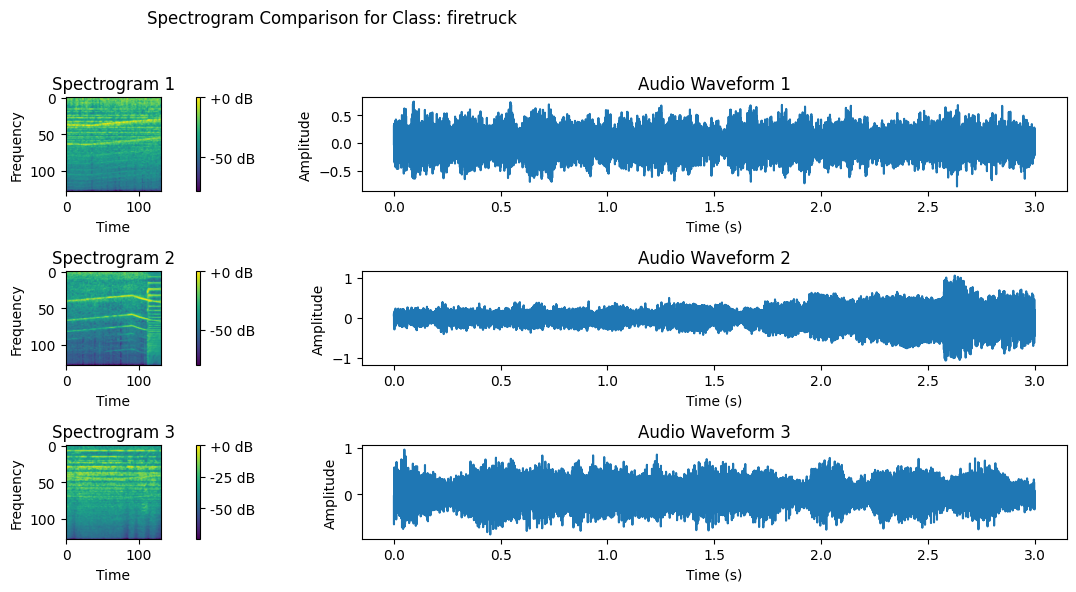

Processing class: ambulance
Label directory: /content/traffic/sounds/ambulance
Found 200 audio files in ambulance directory.
Files: ['sound_41.wav', 'sound_122.wav', 'sound_100.wav', 'sound_172.wav', 'sound_181.wav', 'sound_82.wav', 'sound_55.wav', 'sound_130.wav', 'sound_149.wav', 'sound_95.wav', 'sound_106.wav', 'sound_27.wav', 'sound_108.wav', 'sound_159.wav', 'sound_127.wav', 'sound_189.wav', 'sound_39.wav', 'sound_192.wav', 'sound_133.wav', 'sound_47.wav', 'sound_76.wav', 'sound_129.wav', 'sound_57.wav', 'sound_117.wav', 'sound_20.wav', 'sound_54.wav', 'sound_23.wav', 'sound_99.wav', 'sound_4.wav', 'sound_52.wav', 'sound_25.wav', 'sound_90.wav', 'sound_93.wav', 'sound_190.wav', 'sound_150.wav', 'sound_49.wav', 'sound_110.wav', 'sound_97.wav', 'sound_134.wav', 'sound_183.wav', 'sound_151.wav', 'sound_87.wav', 'sound_131.wav', 'sound_165.wav', 'sound_187.wav', 'sound_98.wav', 'sound_58.wav', 'sound_188.wav', 'sound_114.wav', 'sound_3.wav', 'sound_116.wav', 'sound_71.wav', 'sound_14.

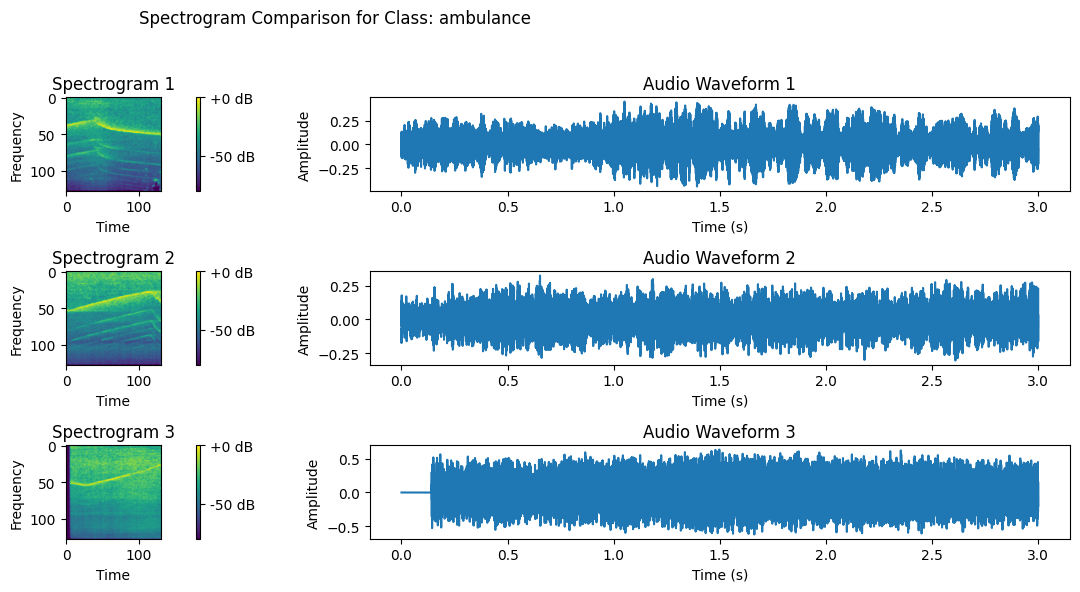

Processing class: traffic
Label directory: /content/traffic/sounds/traffic
Found 200 audio files in traffic directory.
Files: ['sound_477.wav', 'sound_525.wav', 'sound_531.wav', 'sound_420.wav', 'sound_440.wav', 'sound_406.wav', 'sound_482.wav', 'sound_580.wav', 'sound_473.wav', 'sound_511.wav', 'sound_449.wav', 'sound_498.wav', 'sound_486.wav', 'sound_521.wav', 'sound_549.wav', 'sound_405.wav', 'sound_479.wav', 'sound_527.wav', 'sound_469.wav', 'sound_571.wav', 'sound_550.wav', 'sound_466.wav', 'sound_512.wav', 'sound_577.wav', 'sound_465.wav', 'sound_483.wav', 'sound_535.wav', 'sound_506.wav', 'sound_503.wav', 'sound_538.wav', 'sound_524.wav', 'sound_557.wav', 'sound_500.wav', 'sound_591.wav', 'sound_416.wav', 'sound_529.wav', 'sound_559.wav', 'sound_413.wav', 'sound_433.wav', 'sound_499.wav', 'sound_487.wav', 'sound_443.wav', 'sound_475.wav', 'sound_518.wav', 'sound_502.wav', 'sound_552.wav', 'sound_573.wav', 'sound_436.wav', 'sound_589.wav', 'sound_453.wav', 'sound_504.wav', 'sound

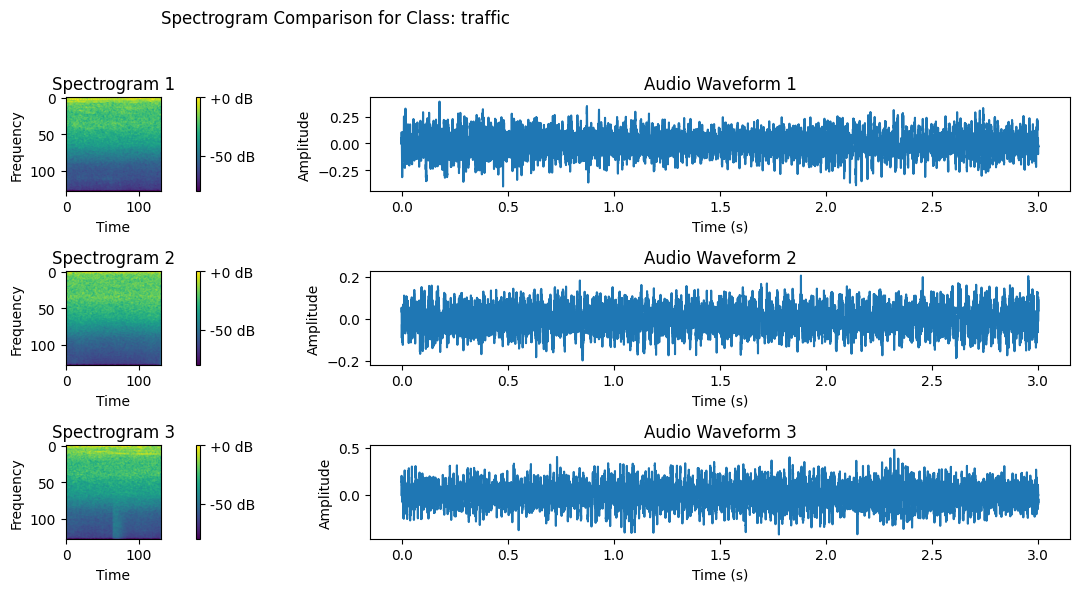

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Set the path to the dataset folder
data_dir = "/content/traffic/sounds"

# List the available classes (subdirectories) in the dataset folder
labels = os.listdir(data_dir)
print("Available classes:", labels)

# Define a function to plot spectrograms for a class
def plot_spectrograms(label, num_samples=3):
    label_dir = os.path.join(data_dir, label)

    # Debugging: Print the label directory
    print(f"Label directory: {label_dir}")

    if not os.path.exists(label_dir):
        print(f"Directory '{label_dir}' does not exist.")
        return

    # Filter out non-audio files
    audio_files = [f for f in os.listdir(label_dir) if any(f.endswith(ext) for ext in ['.wav', '.mp3', '.flac', '.ogg', '.m4a'])]
    print(f"Found {len(audio_files)} audio files in {label} directory.")
    print("Files:", audio_files)

    if len(audio_files) < num_samples:
        print(f"Warning: Less than {num_samples} audio files available. Only {len(audio_files)} will be plotted.")

    plt.figure(figsize=(15, 6))
    plt.suptitle(f"Spectrogram Comparison for Class: {label}")

    for i, audio_file in enumerate(audio_files[:num_samples]):
        audio_path = os.path.join(label_dir, audio_file)
        try:
            y, sr = librosa.load(audio_path, duration=3)
            spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
            spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

            plt.subplot(num_samples, 2, i * 2 + 1)
            plt.title(f"Spectrogram {i + 1}")
            plt.imshow(spectrogram, cmap="viridis")
            plt.colorbar(format="%+2.0f dB")
            plt.xlabel("Time")
            plt.ylabel("Frequency")

            plt.subplot(num_samples, 2, i * 2 + 2)
            plt.title(f"Audio Waveform {i + 1}")
            plt.plot(np.linspace(0, len(y) / sr, len(y)), y)
            plt.xlabel("Time (s)")
            plt.ylabel("Amplitude")

        except Exception as e:
            print(f"Error loading {audio_path}: {e}")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Update these class names with the actual class names from your dataset
for label in labels:
    print(f"Processing class: {label}")
    plot_spectrograms(label, num_samples=3)


In [ ]:
d